## Problem Set 7

Goal: Practice data import and regression. Provide patterns that are likely to be useful in your projects.

* Data curation: invalid values
* Changing input variables: strings to indicators
* Changing output variables
* Colinearity: when inputs tell you the same thing

### Q1: Project brainstorming

We have started working on the final project for the course. Finding an idea that is both exciting and workable is one of the most challenging parts. We will take some time at the beginning of the session to present ideas to other students and offer comments.

Try to be as specific as possible. The biggest killer of cool projects is data availability. Where will you find information, and how much work will it be to get it in a usable form?

Describe some feedback you got and some you offered. Answer individually even if you are working in a group.

Feedback you got on your project: I was told that doing a project on the relationship between Employees and their review for their company was pretty interesting. The dataset though pretty large did not include enough attributes. 

Feedback you offered on other students' projects:

In [1]:
import pandas, numpy
from matplotlib import pyplot
import scipy.stats
from sklearn.linear_model import LinearRegression

For the remaining part of the homework we'll be working with a dataset of information about cars that was compiled in 1985.

In [2]:
## https://www.kaggle.com/toramky/automobile-dataset
## You'll see this dataset in online examples often.
cars = pandas.read_csv("Automobile_data.csv")

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Q : City vs. Highway fuel economy

Display a scatter plot showing `city-mpg` on the $x$-axis and `highway-mpg` on the $y$-axis. Display all points, and start both axes from zero.

Use the sklearn LinearRegression tool to calculate the regression coefficient and intercept to predict `highway-mpg` given `city-mpg`. Display those values, making it clear which is which.

In the provided field describe what you learned about fuel efficiency from this model. Is this result surprising? What other hypotheses might you have had?

Text(0,0.5,'highway-mpg')

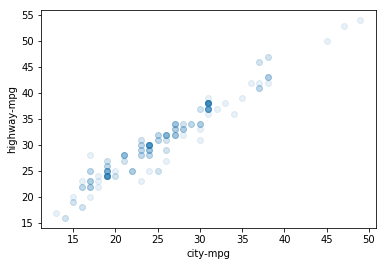

In [4]:
# plot here
pyplot.scatter(cars['city-mpg'], cars['highway-mpg'], alpha = 0.1)
pyplot.xlabel('city-mpg')
pyplot.ylabel('highway-mpg')
# pyplot.xlim(left=0)
# pyplot.ylim(bottom=0)

Text(0,0.5,'highway-mpg')

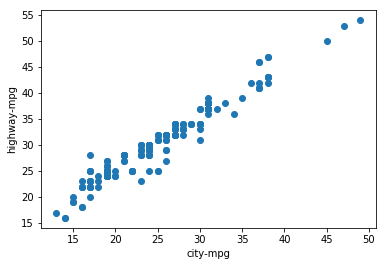

In [26]:
# plot here no alpha shade
pyplot.scatter(cars['city-mpg'], cars['highway-mpg'])
pyplot.xlabel('city-mpg')
pyplot.ylabel('highway-mpg')


In [6]:
# regression here
model = LinearRegression().fit(cars[['city-mpg']],cars[['highway-mpg']])
print("Regression Coefficient:",model.coef_)
print("estimate for b intercept :", model.intercept_)
# numpy.array(cars['city-mpg']).reshape(-1,1)

Regression Coefficient: [[1.02245681]]
estimate for b intercept : [4.96535745]


In [17]:
##model.coef_
print('R Squared Estimate: ')
coeff = model.score(cars[['city-mpg']],cars[['highway-mpg']])
print(coeff)
print('estimate for b intercept ',model.intercept_)

R Squared Estimate: 
0.9448058325717491
estimate for b intercept  [4.96535745]


Describe your interpretation of these values here:
It appears as if there is a very clear linear correlation between highway mile per gallon usage and city driving mile per gallon usage. More efficient cars often have traits that are shared and cause similar efficency measures no matter the environment. For example a large SUV with a large engine requires a lot of gasoline in order to carry the SUV and run its large V8 engine. On the other hand a small civic or corolla runs a smaller engine no matter what the setting is. It also appears that in cities usage is higher causing a consistent shift in the data upwars apx (Y-intercept Units) higher. This is likely because city driving requires constant acceleration and deaccelaration which requires more gas.
I expected that more efficient cars would be more efficient in cities as opposed to highway because they might have better accelaration mechanisms but it appears as if that is not the case or that makes a very small difference. Similarly, the way that an individual drives a car dramatically changes the efficiency (agressive driver who clicks the gas pedal more than neccessary vs a more calm driver).


### Q body style indicator inputs

We know how to use numerical values as inputs, but many interesting variables are categorical. We'll look at the `body-style` variable:

In [8]:
cars.groupby("body-style")["body-style"].count()

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: body-style, dtype: int64

Usually we can use either of two ways of requesting a specific field from a pandas data frame: `frame["x"]` and `frame.x`. Can we use both styles for the `body-style` field? If not, why?

Answer here:

No the frame["x"] syntax will not work since it is designed for character containing strings whereas the body-style field also contains special characters

Lets test it: In this case, the body style only works with the first one and with the make (which doesn't contain a dash)

In [9]:
cars["body-style"] 
# cars.body-style crashes the program
cars.make

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181         toyota
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

There are five distinct values (this was before SUVs were a thing). To use this variable as an input we need to transform it into five variables (one per value) that are 1 if the `body-style` variable has that value, and 0 otherwise. Only one of these new variables will be active for any given car, so this way of encoding categories is sometimes called "one hot". Other terms are "indicator variables" or "dummy variables".

Use the `pandas.get_dummies()` function to create a new dataframe called `style_dummies` with five 0/1 variables. Display the first five rows.

Use the `style_dummies` as input to a linear regression predicting `highway-mpg`. Display the name associated with each coefficient (Hint: call `list()` on a data frame to get the column names).

Discuss whether this result matches your knowledge about car styles.

In [10]:
# create dummies here
style_dummies = pandas.get_dummies(cars["body-style"])
style_dummies.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [11]:
dummy_model = LinearRegression().fit(style_dummies,cars[['highway-mpg']])

for x in range(5):
    print(list(style_dummies)[x], " Coefficient: ", dummy_model.coef_[0][x])
    

convertible  Coefficient:  -2.994952380952385
hardtop  Coefficient:  -1.7449523809523784
hatchback  Coefficient:  3.176476190476191
sedan  Coefficient:  1.8383809523809556
wagon  Coefficient:  -0.2749523809523789


Discuss your linear regression here:
It appears like Hatchbacks and Sedans are the more efficient car styles with wagons being in the middle and convertibles and hardtops being the least efficient. This logically makes sense because convertibles and hardtops are often built as more luxury type cars with engines that favor performance over efficiency. The design of hatchbaks and convertibles often does not favor fluid resistance to air friction as opposed to other car styles. On the other hand hatchbags and sedans have smaller makeshift frames and are often designed to favor aerodynamics and efficency over performance and luxury looks.


### Q : removing invalid values

There are two `?`s in the `horsepower` column, so pandas will interpret the column as a string. Remove the rows with non-numeric values and convert the column to the type `float`. Consult documentation on converting strings to floats.

Display the mean of the `horsepower` variable.

In [14]:
# Class Notes: 
#SELECT all entries such that data[horsepower] != "horsepower"

#cars[logical criterion] ##this will return all rows in cars that satisfy the logical statement
#cars[cars['highway-mpg']>15] ##return all rows in cars dataframe such that the car petaining tp that row has highway mpg > 15

# cars = cars[cars['horsepower'] != "?"]
# print(cars)

In [13]:
# fix data here

cars=cars[cars['horsepower'] != '?'] #Removes horsepower slots that are empty
cars['horsepower'] = cars['horsepower'].astype(float)
mean_hp = cars['horsepower'].mean()
print("Average Horsepower:", mean_hp)


Average Horsepower: 104.25615763546799


### Q : suspiciously similar predictors

Add a new variable called `highway-gphm` to the `cars` data frame that is equal to 100 divided by `highway-mpg`. This is "gallons per hundred miles".

For each of the following pairs of variables create a scatter plot showing the two variables as $x$ and $y$, then fit a linear regression predicting $y$ given $x$, and print the coefficient and intercept:
1. `horsepower` and `highway-mpg`
2. `engine-size` and `highway-mpg`
1. `horsepower` and `highway-gphm`
2. `engine-size` and `highway-gphm`
3. `horsepower` and `engine-size`

Now fit a linear regression predicting `highway-gphm` given `horsepower` and `engine-size`. Display the coefficients, making it clear which coefficient goes with which variable.

Discuss why GPHM might be a better output variable than MPG. Discuss why the coefficients for the `horsepower` and `engine-size` variables are different when you fit the regression individually than when you fit them together in a single linear model.

In [16]:
cars=cars[cars['highway-mpg'] > 0]
new_gphm = []
for mpg in list(cars['highway-mpg']):
    new_gphm.append(100/mpg)
cars['highway-gphm'] = new_gphm
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-gphm
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495,3.703704
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500,3.703704
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500,3.846154
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950,3.333333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450,4.545455


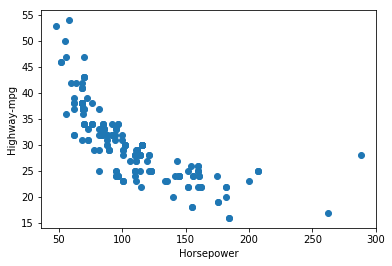

1: Horsepower by Highway MPG 
Coefficient:  [[-0.1343341]]
Intercept Estimate:  [44.7539257]


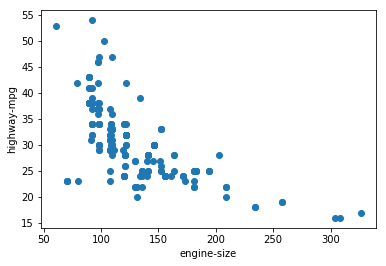

2: Engine Size by Highway MPG 
Coefficient:  [[-0.11205688]]
Intercept Estimate:  [44.9639837]


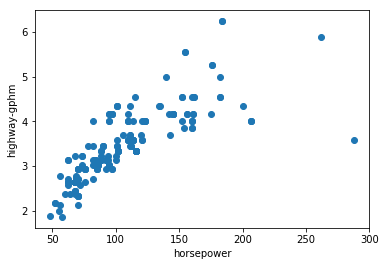

3: Horsepower by Highway GPHM 
Coefficient:  [[0.01596229]]
Intercept Estimate:  [1.75660623]


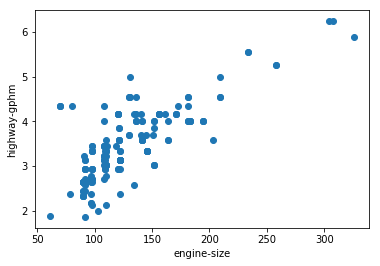

4: Engine Size by Highway GPHM 
Coefficient:  [[0.01469632]]
Intercept Estimate:  [1.55644056]


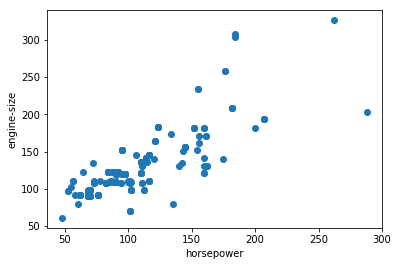

5: Horsepower by Engine Size 
Coefficient:  [[0.85427448]]
Intercept Estimate:  [37.7937685]

6: Horsepower and Engine Size by Highway GPHM 
Coefficient for highway GPHM vs. Horsepower:  [[0.00994491 0.00704385]]
Coefficient for highway GPHM vs. Engine Size:  0.007043848805384111
Intercept Estimate:  [1.49039264]


In [25]:
# plots and regressions here
pyplot.scatter(cars['horsepower'],cars['highway-mpg'])
pyplot.xlabel('Horsepower')
pyplot.ylabel('Highway-mpg')
pyplot.show()
horespower_by_hmpg= LinearRegression().fit(cars[['horsepower']],cars[['highway-mpg']])
print("1: Horsepower by Highway MPG ")
print("Coefficient: ", horespower_by_hmpg.coef_)
print("Intercept Estimate: ", horespower_by_hmpg.intercept_)

pyplot.scatter(cars['engine-size'],cars['highway-mpg'])
pyplot.xlabel('engine-size')
pyplot.ylabel('highway-mpg')
pyplot.show()
ES_by_HMPG = LinearRegression().fit(cars[['engine-size']],cars[['highway-mpg']])
print("2: Engine Size by Highway MPG ")
print("Coefficient: ", ES_by_HMPG.coef_)
print("Intercept Estimate: ", ES_by_HMPG.intercept_)

pyplot.scatter(cars['horsepower'],cars['highway-gphm'])
pyplot.xlabel('horsepower')
pyplot.ylabel('highway-gphm')
pyplot.show()
HP_By_HGPHM = LinearRegression().fit(cars[['horsepower']],cars[['highway-gphm']])
print("3: Horsepower by Highway GPHM ")
print("Coefficient: ", HP_By_HGPHM.coef_)
print("Intercept Estimate: ", HP_By_HGPHM.intercept_)

pyplot.scatter(cars['engine-size'],cars['highway-gphm'])
pyplot.xlabel('engine-size')
pyplot.ylabel('highway-gphm')
pyplot.show()
ES_by_HGPHM = LinearRegression().fit(cars[['engine-size']],cars[['highway-gphm']])
print("4: Engine Size by Highway GPHM ")
print("Coefficient: ", ES_by_HGPHM.coef_)
print("Intercept Estimate: ", ES_by_HGPHM.intercept_)

pyplot.scatter(cars['horsepower'],cars['engine-size'])
pyplot.xlabel('horsepower')
pyplot.ylabel('engine-size')
pyplot.show()
hb_by_es = LinearRegression().fit(cars[['horsepower']],cars[['engine-size']])
print("5: Horsepower by Engine Size ")
print("Coefficient: ", hb_by_es.coef_)
print("Intercept Estimate: ", hb_by_es.intercept_)
print()

hb_and_es_by_hgphm = LinearRegression().fit(cars[['horsepower', 'engine-size']],cars[['highway-gphm']] )
print("6: Horsepower and Engine Size by Highway GPHM ")
print("Coefficient for highway GPHM vs. Horsepower: ", hb_and_es_by_hgphm.coef_)
print("Coefficient for highway GPHM vs. Engine Size: ", hb_and_es_by_hgphm.coef_[0][1])
print("Intercept Estimate: ", hb_and_es_by_hgphm.intercept_)

Discuss why GPHM might be a better output variable than MPG:

These results show a very important point about mpg fuel efficiency. Many people mistake fuel efficiency as being a linear correlation that gets more efficient the same amount at different horespowers. However, in truth the correlation is actually more curved and thus more exponential different in most cases. Solely the horsepower by highway mpg and engine size by highway mpg are negative indication the opposite effect as when they are plotted with highway GPHM. Thus each individual variable has its benefits in understanding the car efficiency while GPHM is better at showing the differentiated affect of efficient cars that are specifically designed to be efficient in certain settings. 

Discuss why the coefficients for the horsepower and engine-size variables are different when you fit the regression individually than when you fit them together in a single linear model.

When the variables are fit individually the coefficient entirely depends on the individual effect on the coefficient whereas when they are fit together the coefficient has to take into consideration the interaction between the individual values. This causes their individual coefficients to be more correlating than when they are graphed together.